In [19]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
from datetime import timedelta, date

In [257]:
def downloadGoogleSheet(sheet_name,sheet_id = '1ea1KyavzSm0sQTkMqj5HIUOAaKz0gPNx3zN_T-a54HI'):
    
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    
    df = pd.read_csv(url)
    df['Unnamed: 1'] = df['Unnamed: 1'].astype('datetime64[ns]')
    df.iloc[:,3] = df.iloc[:,3].str.split().str[0].str.replace(',','').astype(float)
    return df
    
df = downloadGoogleSheet('PaymentRegister!')

# def datetimeObj(d):
#     datetime1 = datetime.strptime('07/11/2019', '%m/%d/%Y')
#     return datetime1


def weeklyTotal(df,Commodity,DateLow,DateHigh):
    #select dataframe for commodity of interest:
    newdf = df[df['Unnamed: 2'] == Commodity]
    #select dates inbetween date low and date high
    mask = (newdf['Unnamed: 1'] >= DateLow) & (newdf['Unnamed: 1'] < DateHigh)
    newdf = newdf.loc[mask]
    
    #we want to sum the values here
    
    sumval = np.sum(newdf.iloc[:,[3]].values)
    
    return sumval




def daterange(date1, date2):
    datelist = []
    for n in range(int ((date2 - date1).days/7)):
        datelist.append((date1 + timedelta(n)*7).strftime("%Y-%m-%d"))
    
    return datelist
        
        

# start_dt = date(2015, 12, 20)
# end_dt = date(2016, 5, 11)
# for dt in daterange(start_dt, end_dt):
#     print(dt.strftime("%Y-%m-%d"))


def createNewDataFrame(DateHigh = date(2021,6,1),DateLow = date(2020,5,22),CommodityList = ['onions','potatoes','milk','transportation']):
    
    df = downloadGoogleSheet('PaymentRegister!')
    
    #make lower case and 
    
    commoditylist = df['Unnamed: 2'].values
    for i in range(len(commoditylist)):
        #first remove spaces
        try:
            commoditylist[i] = commoditylist[i].replace(' ','')
        except:
            pass
        #next lower case
        try:
            commoditylist[i] = commoditylist[i].lower()
        except:
            pass
        #next onions
        try:
            if 'onion' in commoditylist[i]:
                commoditylist[i] = 'onions'
        except:
            pass
        
        #next potatoes
        try:
            if 'potato' in commoditylist[i]:
                commoditylist[i] = 'potatoes'
        except:
            pass
        #next milk
        try:
            
            if 'milk' in commoditylist[i]:
                commoditylist[i] = 'milk'
        except:
            pass
        #next transportation
        try:
            if 'transportation' in commoditylist[i]:
                commoditylist[i] = 'transportation'
        except:
            pass
    df['Unnamed: 2'] = commoditylist
    
    
    
    
    dfdict = {}
    rowlist = []
    #create Dummy Data Frame:
    for c in CommodityList:
        rowlist.append(c+' Total Spend')
        
        ########
    for c in CommodityList:
        rowlist.append(c+' Pounds')
        ########
        
    firstvals = list(np.zeros(len(rowlist)))
    
    frame = {' ': pd.Series(rowlist), '0':pd.Series(firstvals)}
  
    newdf = pd.DataFrame(frame)
    newdf = newdf.set_index(' ')
    
    datelist = daterange(DateLow,DateHigh)
    
       
    
    for i in range(len(datelist)-1):
        dtlow =datelist[i]
        dthigh = datelist[i+1]
        
        data = []
        
        for c in CommodityList:
            sumval = weeklyTotal(df,c,dtlow,dthigh)
            
            data.append(sumval)
        
        ########
        for c in CommodityList:
            c = c.lower()
            #decompose dflbs
            
            newmask = (dflbs['Date'] >= dtlow) & (dflbs['Date'] < dthigh)
            dflbsnew = dflbs.loc[newmask]
            dflbsnew = dflbsnew[dflbsnew['Produce']==c]
            sumval = np.sum(dflbsnew['Lbs'].values)
            data.append(sumval)
        newdf[dtlow] = data
    newdf = newdf.drop(['0'], axis=1)
    return newdf

    
    
    
    


In [258]:
newdf = createNewDataFrame()
# newdf.to_csv('KirasData.csv')


In [259]:
newdf

,2020-05-22,2020-05-29,2020-06-05,2020-06-12,2020-06-19,2020-06-26,2020-07-03,2020-07-10,2020-07-17,2020-07-24,...,2021-03-12,2021-03-19,2021-03-26,2021-04-02,2021-04-09,2021-04-16,2021-04-23,2021-04-30,2021-05-07,2021-05-14
,,,,,,,,,,,,,,,,,,,,,
onions Total Spend,0.00,10489.00,22618.0,51250.00,0.0,0.0,0.0,0.00,0.00,39380.00,...,6960.0,9571.50,18696.2,20601.60,8925.00,3400.00,5737.50,0.0,1548.0,17106.0
potatoes Total Spend,10140.00,9076.00,39525.2,7000.00,16480.0,21360.5,22364.0,25405.68,60746.43,42821.19,...,6481.2,20791.46,10073.6,9590.40,23430.96,4500.00,6625.84,1200.0,0.0,0.0
milk Total Spend,0.00,14115.50,4500.0,17061.00,0.0,6000.0,3852.3,0.00,0.00,1900.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
transportation Total Spend,126.88,926.03,0.0,2278.25,0.0,615.0,0.0,0.00,1150.00,580.00,...,1125.0,10603.41,3529.0,865.67,1200.00,3659.63,1121.83,0.0,0.0,0.0
onions Pounds,40000.00,120000.00,302500.0,80000.00,40000.0,0.0,0.0,0.00,0.00,160000.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
potatoes Pounds,240397.00,114800.00,457000.0,200000.00,160000.0,198400.0,163000.0,300000.00,526000.00,437900.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
milk Pounds,34000.00,543180.00,1043955.0,0.00,400000.0,1022960.0,36326.0,0.00,44836.00,254444.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0
transportation Pounds,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [41]:
np.sum(oniondf.iloc[:,[3]].values)

'6,103.004,386.004,386.004,386.003,321.006,139.006,139.004,386.004,386.004,286.006,156.004,386.004,286.004,386.005,841.005,841.005,841.005,841.006,953.006,642.006,962.004,917.006,953.006,953.006,544.006,953.006,980.006,962.006,953.006,953.006,953.006,953.008,112.006,110.001,000.003,400.003,400.005,236.005,236.005,236.003,400.005,188.005,236.005,176.005,236.003,400.003,400.005,236.005,200.005,236.003,400.003,400.003,400.003,340.003,400.003,400.005,236.005,236.005,236.005,158.005,152.005,236.003,400.003,400.003,400.003,400.003,400.003,400.003,400.003,400.003,400.003,400.003,400.003,400.005,236.005,146.005,164.005,098.005,236.003,300.003,400.003,400.003,400.003,408.003,400.003,400.003,400.002,975.002,975.002,975.002,975.002,800.002,975.002,975.002,975.002,975.003,762.002,975.002,975.002,975.00789.002,975.002,975.002,975.002,975.002,975.003,344.002,975.002,685.252,762.502,975.001,045.003,560.003,400.003,400.002,975.002,807.002,983.002,975.002,975.002,450.001,050.003,553.003,187.502,550.003

In [37]:
oniondf = df[df['Unnamed: 2']=='Onions']
DateLow = '7-11-2019'

oniondf[datetimeObj(oniondf['Unnamed: 1'])>= datetimeObj(DateLow)]




KeyError: True

In [22]:
oniondf

,Payment Register,Unnamed: 1,Unnamed: 2,"2,948,936.16",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
7,Owyhee Produce,6/4/20,Onions,"6,103.00",Shay Myers,shay@owyheeproduce.com,"34325 Apple Valley Road Parma, ID 83660",NaN,NaN,Net 30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Jensen Farms,6/4/20,Onions,"4,386.00",Adam Jensen,jensenonions@gmail.com,205 N 1ST ST WARDEN WA 98857,4.796811e+11,125000574.0,Net 30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Jensen Farms,6/5/20,Onions,"4,386.00",Adam Jensen,jensenonions@gmail.com,205 N 1ST ST WARDEN WA 98857,4.796811e+11,125000574.0,Net 30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Jensen Farms,6/9/20,Onions,"4,386.00",Adam Jensen,jensenonions@gmail.com,205 N 1ST ST WARDEN WA 98857,4.796811e+11,125000574.0,Net 30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Owyhee Produce,6/10/20,Onions,"3,321.00",Shay Myers,shay@owyheeproduce.com,"11609 Hereford Rd Los Banos , CA 93635",NaN,NaN,Net 30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,Easterday Farms Produce,5/18/21,Onions,"2,550.00",Easterday Farms Produce Co,Kasandra@easterdayfarms.com,Bank of America,6.882002e+07,125000024.0,Net 21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1155,Easterday Farms Produce,5/19/21,Onions,"2,550.00",Easterday Farms Produce Co,Kasandra@easterdayfarms.com,Bank of America,6.882002e+07,125000024.0,Net 21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,Easterday Farms Produce,5/19/21,Onions,"2,550.00",Easterday Farms Produce Co,Kasandra@easterdayfarms.com,Bank of America,6.882002e+07,125000024.0,Net 21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,Easterday Farms Produce,5/19/21,Onions,"2,550.00",Easterday Farms Produce Co,Kasandra@easterdayfarms.com,Bank of America,6.882002e+07,125000024.0,Net 21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
d = oniondf['Unnamed: 1'].values[0]

In [33]:
d

'6/4/20'

2015-12-20
2015-12-27
2016-01-03
2016-01-10
2016-01-17
2016-01-24
2016-01-31
2016-02-07
2016-02-14
2016-02-21
2016-02-28
2016-03-06
2016-03-13
2016-03-20
2016-03-27
2016-04-03
2016-04-10
2016-04-17
2016-04-24
2016-05-01


NameError: name 'datelist' is not defined

In [234]:
dflbs = pd.read_csv('Deals Overview  - 2020 monthly lb counter.csv')


In [235]:
# for row in dflbs:
#     print(row)

dflbs = dflbs.iloc[2:,[10,13,14]].rename(columns={"Unnamed: 10": "Date", "   Produce": "Produce", "Unnamed: 14": "Lbs"})




In [236]:
dflbs = dflbs.dropna()

In [237]:
dflbs

,Date,Produce,Lbs
2,4/18/2020,Onions,"50,000"
3,4/16/2020,"Eggs(10,800)","1,500"
4,5/5/2020,"Eggs(67,000)","18,000"
5,5/7/2020,Zucchini,"24,000"
6,5/8/2020,potatoes,"43,240"
...,...,...,...
720,1/29,potatoes,"42,000"
721,1/29,potatoes,"42,000"
722,1/29,potatoes,"39,750"
723,1/29,potatoes,"41,000"


In [238]:

pounds = dflbs['Lbs'].values
for i in range(len(pounds)):
    pounds[i] = pounds[i].replace(',','')
dflbs['Lbs'] = pounds

fixeddates = dflbs['Date'].values
for i in range(len(fixeddates)):
    fixeddates[i] = fixeddates[i].replace(' ','')
    if len(fixeddates[i]) <5:
        fixeddates[i] = fixeddates[i]+ '/2021'
dflbs['Date'] = fixeddates


# for row in dflbs:
#     print(row)
prod = dflbs['Produce'].values

for i in range(len(prod)):
    prod[i] = prod[i].lower()
    prod[i] = prod[i].replace(' ','')
    if 'potatoes' in prod[i]:
        prod[i] = 'potatoes'
    if 'onions' in prod[i]:
        prod[i] = 'onions'
    if 'milk' in prod[i]:
        prod[i] = 'milk'

dflbs['Produce'] = prod
dflbs

,Date,Produce,Lbs
2,4/18/2020,onions,50000
3,4/16/2020,"eggs(10,800)",1500
4,5/5/2020,"eggs(67,000)",18000
5,5/7/2020,zucchini,24000
6,5/8/2020,potatoes,43240
...,...,...,...
720,1/29/2021,potatoes,42000
721,1/29/2021,potatoes,42000
722,1/29/2021,potatoes,39750
723,1/29/2021,potatoes,41000


In [239]:
dflbs['Date'] = dflbs['Date'].astype('datetime64[ns]')
dflbs['Lbs'] = dflbs['Lbs'].astype('float64')

In [224]:
dflbs.iloc[700:,:]

,Date,Produce,Lbs
704,2020-12-01,limes,32000.0
705,2021-01-13,limes,32000.0
706,2021-01-25,papayas,32000.0
707,2021-01-13,papayas,32000.0
708,2021-01-26,mixedgreens,25000.0
709,2021-01-28,mixedgreens,25000.0
710,2021-01-29,mixedgreens,25000.0
711,2021-01-28,onions,42500.0
712,2021-01-28,sweetpotatoes,40000.0
713,2021-01-29,sweetpotatoes,40000.0


In [260]:
dfvis = newdf.iloc[:,:34]

In [261]:
dfvis = dfvis.transpose()

In [263]:
dfvis = dfvis.drop('transportation Pounds', axis = 1)

In [264]:
dfvis

,onions Total Spend,potatoes Total Spend,milk Total Spend,transportation Total Spend,onions Pounds,potatoes Pounds,milk Pounds
2020-05-22,0.00,10140.00,0.0,126.88,40000.0,240397.0,34000.0
2020-05-29,10489.00,9076.00,14115.5,926.03,120000.0,114800.0,543180.0
2020-06-05,22618.00,39525.20,4500.0,0.00,302500.0,457000.0,1043955.0
2020-06-12,51250.00,7000.00,17061.0,2278.25,80000.0,200000.0,0.0
2020-06-19,0.00,16480.00,0.0,0.00,40000.0,160000.0,400000.0
2020-06-26,0.00,21360.50,6000.0,615.00,0.0,198400.0,1022960.0
2020-07-03,0.00,22364.00,3852.3,0.00,0.0,163000.0,36326.0
2020-07-10,0.00,25405.68,0.0,0.00,0.0,300000.0,0.0
2020-07-17,0.00,60746.43,0.0,1150.00,0.0,526000.0,44836.0
2020-07-24,39380.00,42821.19,1900.0,580.00,160000.0,437900.0,254444.0


In [274]:
costPerPoundOnions = []
costPerPoundPotatoes = []
costPerPoundMilk = []

oniondollars = dfvis['onions Total Spend'].values
onionpounds = dfvis['onions Pounds'].values
costPerPoundOnions = oniondollars/onionpounds

potatoesdollars= dfvis['potatoes Total Spend'].values
potatoespounds = dfvis['potatoes Pounds'].values
costPerPoundPotatoes = potatoesdollars/potatoespounds

milkdollars= dfvis['milk Total Spend'].values
milkpounds = dfvis['milk Pounds'].values
costPerPoundMilk = milkdollars/milkpounds

dfvis['Cost Per Pound: Onions'] = costPerPoundOnions
dfvis['Cost Per Pound: Potatoes'] = costPerPoundPotatoes
dfvis['Cost Per Pound: Milk'] = costPerPoundMilk

<ipython-input-274-9c178c367acd>:7: RuntimeWarning: divide by zero encountered in true_divide
  costPerPoundOnions = oniondollars/onionpounds
<ipython-input-274-9c178c367acd>:7: RuntimeWarning: invalid value encountered in true_divide
  costPerPoundOnions = oniondollars/onionpounds
<ipython-input-274-9c178c367acd>:11: RuntimeWarning: divide by zero encountered in true_divide
  costPerPoundPotatoes = potatoesdollars/potatoespounds
<ipython-input-274-9c178c367acd>:11: RuntimeWarning: invalid value encountered in true_divide
  costPerPoundPotatoes = potatoesdollars/potatoespounds
<ipython-input-274-9c178c367acd>:15: RuntimeWarning: divide by zero encountered in true_divide
  costPerPoundMilk = milkdollars/milkpounds
<ipython-input-274-9c178c367acd>:15: RuntimeWarning: invalid value encountered in true_divide
  costPerPoundMilk = milkdollars/milkpounds


In [275]:
dfvis

,onions Total Spend,potatoes Total Spend,milk Total Spend,transportation Total Spend,onions Pounds,potatoes Pounds,milk Pounds,Cost Per Pound: Onions,Cost Per Pound: Potatoes,Cost Per Pound: Milk
2020-05-22,0.00,10140.00,0.0,126.88,40000.0,240397.0,34000.0,0.000000,0.042180,0.000000
2020-05-29,10489.00,9076.00,14115.5,926.03,120000.0,114800.0,543180.0,0.087408,0.079059,0.025987
2020-06-05,22618.00,39525.20,4500.0,0.00,302500.0,457000.0,1043955.0,0.074770,0.086488,0.004311
2020-06-12,51250.00,7000.00,17061.0,2278.25,80000.0,200000.0,0.0,0.640625,0.035000,inf
2020-06-19,0.00,16480.00,0.0,0.00,40000.0,160000.0,400000.0,0.000000,0.103000,0.000000
2020-06-26,0.00,21360.50,6000.0,615.00,0.0,198400.0,1022960.0,NaN,0.107664,0.005865
2020-07-03,0.00,22364.00,3852.3,0.00,0.0,163000.0,36326.0,NaN,0.137202,0.106048
2020-07-10,0.00,25405.68,0.0,0.00,0.0,300000.0,0.0,NaN,0.084686,NaN
2020-07-17,0.00,60746.43,0.0,1150.00,0.0,526000.0,44836.0,NaN,0.115488,0.000000
2020-07-24,39380.00,42821.19,1900.0,580.00,160000.0,437900.0,254444.0,0.246125,0.097788,0.007467


In [277]:
dfviskira = dfvis.transpose()
dfviskira.to_csv('KiraCsvCost.csv')

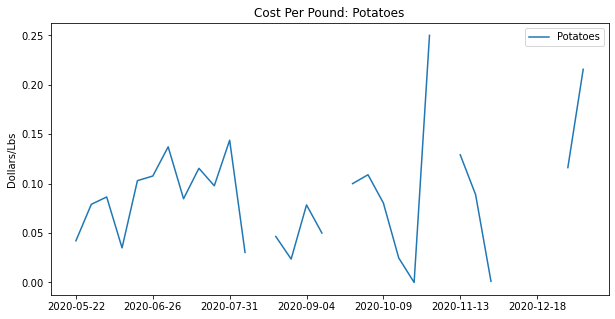

In [290]:
#let's do some plotting
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
dfvis['Cost Per Pound: Potatoes'].plot(label = 'Potatoes')
# dfvis['Cost Per Pound: Onions'].plot(label = 'Onions')
# dfvis['Cost Per Pound: Milk'].plot(label = 'Milk')

plt.ylabel('Dollars/Lbs')
plt.title('Cost Per Pound: Potatoes')
# plt.ylim([-.05, .75])
plt.legend()
plt.savefig('PotatoesCostPerPound.pdf')
plt.show()

In [459]:
df = pd.read_csv('Deals Overview  - Archive.csv')

In [460]:
# df.iloc[:,[10,12,13,14,15,16,17]]
df= df.iloc[2:,[10,12,13,14,15,16,17]].rename(columns={"Unnamed: 10": "Date", "   Produce": "Produce", "Unnamed: 13": "Lbs",
"Payment": "Payment To Farm", "Unnamed: 15": "Transportation", "Unnamed: 16": "Additional Fees",'Unnamed: 17': "Total Cost"})

df



,Date,Produce,Lbs,Payment To Farm,Transportation,Additional Fees,Total Cost
2,4/18/2020,Onions,"50,000",$400,NaN,NaN,$400
3,4/16/2020,"Eggs(10,800)","1,500",$900,NaN,NaN,$900
4,5/5/2020,"Eggs(67,000)","18,000",NaN,NaN,NaN,NaN
5,5/7/2020,Zucchini,"24,000",NaN,$0,NaN,NaN
6,5/8/2020,potatoes,"43,240",$500,$560,NaN,"$1,060"
...,...,...,...,...,...,...,...
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [461]:
def cleanColumnFees(col):
    col = col.replace(np.nan,0)
    col = col.astype('str')
    col = col.str.strip('$ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz, ')
    col = col.replace({'\$':''}, regex = True)
    col = col.replace({'\,':''}, regex = True)
    col = col.replace({'\ ':''}, regex = True)
    col = col.replace('',0)
    col = col.astype('float64')
    col = col.fillna(0)
    return col

lbslist = df['Lbs'].values
for i in range(len(lbslist)):
    try:
        lbslist[i] = lbslist[i].replace(',','')
    except:
        pass
    
    try:
        if 'egg' in lbslist[i]:
            lbslist[i] = '0'
    except:
        pass
    
df['Lbs'] = lbslist

df['Payment To Farm'] = cleanColumnFees(df['Payment To Farm'])
df['Transportation'] = cleanColumnFees(df['Transportation'])
df['Additional Fees'] = cleanColumnFees(df['Additional Fees'])
df['Total Cost'] = cleanColumnFees(df['Total Cost'])
df['Lbs'] = cleanColumnFees(df['Lbs'])


df = df.dropna()

In [462]:
fixeddates = df['Date'].values
for i in range(len(fixeddates)):
    fixeddates[i] = fixeddates[i].replace(' ','')
    if len(fixeddates[i]) <7:
        if fixeddates[i].startswith('12/') or fixeddates[i].startswith('11/'):
            fixeddates[i] = fixeddates[i]+ '/2020'
        else:
            fixeddates[i] = fixeddates[i]+ '/2021'
    elif 'Oct/' in fixeddates[i]:
        fixeddates[i] = '10/31/2020'
    
    if fixeddates[i] == '4/31/2021':
        fixeddates[i] = '4/30/2021'
df['Date'] = fixeddates


# for row in dflbs:
#     print(row)
prod = df['Produce'].values

for i in range(len(prod)):
    prod[i] = prod[i].lower()
    prod[i] = prod[i].replace(' ','')
    if 'potatoes' in prod[i]:
        prod[i] = 'potatoes'
    elif 'onions' in prod[i]:
        prod[i] = 'onions'
    else:
        prod[i] = 'other'
        
    

df['Produce'] = prod

# s= df['Date']

# for i in range(df.shape[0]):
    
#     print(df['Date'].iloc[i])
    
# assert False

df['Date'] = df['Date'].astype('datetime64[ns]')

# for i in range(len(s)):
#     val = s.iloc[i]
# #     print(val)
#     try:
#         val = pd.to_date(val, infer_datetime_format=True)
#     except:
#         val = np.nan
#     s.iloc[i] = val

# df['Date'] = s




    

df.dropna()

df
    
    
# dflbs['Lbs'] = dflbs['Lbs'].astype('float64')

<ipython-input-462-cec2714bc4f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = fixeddates
<ipython-input-462-cec2714bc4f6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Produce'] = prod
<ipython-input-462-cec2714bc4f6>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,Date,Produce,Lbs,Payment To Farm,Transportation,Additional Fees,Total Cost
2,2020-04-18,onions,50000.0,400.0,0.0,0.0,400.0
3,2020-04-16,other,1500.0,900.0,0.0,0.0,900.0
4,2020-05-05,other,18000.0,0.0,0.0,0.0,0.0
5,2020-05-07,other,24000.0,0.0,0.0,0.0,0.0
6,2020-05-08,potatoes,43240.0,500.0,560.0,0.0,1060.0
...,...,...,...,...,...,...,...
1023,2021-05-26,other,24000.0,0.0,1200.0,0.0,1200.0
1024,2021-05-26,other,8000.0,0.0,0.0,0.0,0.0
1025,2021-05-24,potatoes,40000.0,3200.0,0.0,0.0,3200.0
1026,2021-05-25,potatoes,40000.0,3200.0,0.0,0.0,3200.0


In [463]:
#maybe we should just make a weekly data frame for a single item at a time. start with potatoes
def daterange(date1, date2):
    datelist = []
    for n in range(int ((date2 - date1).days/7)):
        datelist.append((date1 + timedelta(n)*7).strftime("%Y-%m-%d"))
    
    return datelist



def weeklyTotal2(df,Commodity,DateLow,DateHigh):
    #select dataframe for commodity of interest:
    newdf = df[df['Produce'] == Commodity]
    #select dates inbetween date low and date high
    mask = (newdf['Date'] >= DateLow) & (newdf['Date'] < DateHigh)
    newdf = newdf.loc[mask]
    
    #we want to sum the values here
    
    lbsum = np.sum(newdf['Lbs'].values)
    foodcostsum = np.sum(newdf['Payment To Farm'].values)
    transportationcost = np.sum(newdf['Transportation'].values)
    
    return lbsum,foodcostsum,transportationcost





def DataByProduct(df,Commodity,DateLow,DateHigh):
    
    datelist = daterange(DateLow,DateHigh)
    
    dfdict = {}
    dfdict['Date'] = []
    dfdict[Commodity+' Cost (Farm)'] = []
    dfdict[Commodity+' Cost (Transportation)'] = []
    dfdict[Commodity+' Pounds'] = []
    dfdict[Commodity+' Cost Per Pound: Food'] = []
    dfdict[Commodity+' Cost Per Pound: Transportation'] = []
    
    
    for i in range(len(datelist)-1):
        dlow = datelist[i]
        dhigh = datelist[i+1]
        lbsum,foodcostsum,transportationcost = weeklyTotal2(df,Commodity,dlow,dhigh)
        dfdict['Date'].append(dlow)
        dfdict[Commodity+' Pounds'].append(lbsum)
        dfdict[Commodity+' Cost (Farm)'].append(foodcostsum)
        dfdict[Commodity+' Cost (Transportation)'].append(transportationcost)
        if (lbsum ==0) or (foodcostsum==0):
            dfdict[Commodity+' Cost Per Pound: Food'].append(0)
        else:
            dfdict[Commodity+' Cost Per Pound: Food'].append((foodcostsum)/lbsum)
            
        if (lbsum ==0) or (transportationcost==0):
            dfdict[Commodity+' Cost Per Pound: Transportation'].append(0)
        else:
            dfdict[Commodity+' Cost Per Pound: Transportation'].append((transportationcost)/lbsum)
        
    dfnew = pd.DataFrame(dfdict)
    dfnew = dfnew.set_index('Date')
    return dfdict, dfnew
        
    
potatoDict,potatoData = DataByProduct(df,'potatoes',date(2020,4,18),date(2021,5,25))
onionDict, onionData = DataByProduct(df,'onions',date(2020,4,18),date(2021,5,25))
otherDict, otherData = DataByProduct(df,'other',date(2020,4,18),date(2021,5,25))

# pd.concat([potatoData, onionData], axis=0)

ndic = {**potatoDict, **onionDict,**otherDict}

newdf = pd.DataFrame(ndic)
newdf = newdf.set_index('Date')
kirasdata = newdf.transpose()
kirasdata.to_csv('KiraDataArchive.csv')

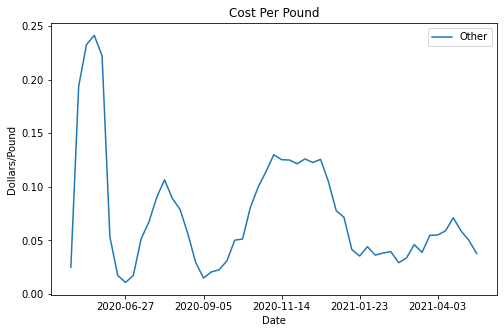

In [473]:
#make plots:

plt.figure(figsize = (8,5))
plt.title('Cost Per Pound')
# newdf['potatoes Cost Per Pound: Food'].plot(label= 'Potatoes')
newdf['other Cost Per Pound: Food'].rolling(4).mean().plot(label= 'Other')
# newdf['onions Cost Per Pound'].plot(label= 'Onions')
# newdf['milk Cost Per Pound'].plot(label= 'Milk')
plt.ylabel('Dollars/Pound')
plt.legend()
# plt.savefig('PotatoPlotNew.pdf')
plt.show()